In [1]:
import os
working_dir ='/kaggle/input/6class-cmt'
os.chdir(working_dir)
!ls

cyberbullying_tweets.csv


# Cài đặt thư viện cần thiết

In [2]:
!pip install transformers
# Cài đặt pytorch
!pip install torch
# Cài đặt sklearn
!pip install scikit-learn
!pip install underthesea

# Tải pretrained model Bert

In [3]:
import torch
from transformers import AutoModel, AutoTokenizer

# Hàm load model BERT
def load_bert():
    bert_model = AutoModel.from_pretrained("bert-base-uncased")
    bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased", use_fast=False)
    return bert_model, bert_tokenizer

In [4]:
bert, tokenizer=load_bert()

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

#  Tiền xử lí dữ liệu

In [5]:
import re
import csv
from sklearn.model_selection import train_test_split
import pickle


def get_data(file_path):
    with open(file_path, encoding='utf-8', errors='replace') as csvfile:
        csvreader = csv.reader(csvfile)
        data = [row for row in csvreader if any(field.strip() for field in row)]
    return data

# Đọc dữ liệu
all_data = get_data('/kaggle/input/6class-cmt/cyberbullying_tweets.csv')

# Tách tiêu đề và dữ liệu
header = all_data[0]
data = all_data[1:]

# Tách cột văn bản và nhãn
texts = [row[0] for row in data]
labels = [row[1] for row in data]

# Tiền xử lý toàn bộ văn bản
texts = [text for text in texts]

# Chia dữ liệu thành train và test với tỷ lệ 80:20
train_text, test_text, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)



# Hàm để lưu dữ liệu vào tệp pickle
def save_pickle(data, filename):
    with open(filename, 'wb') as f:
        pickle.dump(data, f)

# Lưu các tập dữ liệu
save_pickle(train_text, '/kaggle/working/train_text.pkl')
save_pickle(train_labels, '/kaggle/working/train_labels.pkl')
save_pickle(test_text, '/kaggle/working/test_text.pkl')
save_pickle(test_labels, '/kaggle/working/test_labels.pkl')

print("Đã chia và lưu dữ liệu thành công!")

Đã chia và lưu dữ liệu thành công!


In [6]:
import underthesea
import re
# Biểu thức chính quy để phát hiện URL
url_pattern = r'http\S+'
# Biểu thức chính quy để phát hiện số
number_pattern = r'\d+'
def PreDT(aline):
    # Loại bỏ các URL từ văn bản
    aline = re.sub(url_pattern, '', aline)
    # Loại bỏ các số trong văn bản
    aline = re.sub(number_pattern, '', aline)
    #Xóa các kí tự nhiễu ở cuối chuỗi
    aline = re.sub(r"[()=+-/*&,.;:\'!?\-''""]+$-", "", aline)
    # Xóa các kí tự nhiễu ở trong chuỗi
    aline = re.sub(r'[()=+-/*&,".;:“”\'!?\-]', ' ',aline)
    #xóa khoảng trắng đầu câu và cuối câu
    aline = aline.strip()
    #Tách câu thành các từ
    aline = underthesea.word_tokenize(aline, format="text")
    #Tokenizer bằng bộ token của bert
    aline = tokenizer.encode(aline)
    return aline

In [7]:
import pickle


# Đường dẫn file đọc
train_file = '/kaggle/working/train_text.pkl'
test_file = '/kaggle/working/test_text.pkl'

open_files = [train_file, test_file]

# Đường dẫn file lưu
train_save = '/kaggle/working/train_text_token.pkl'
test_save = '/kaggle/working/test_text_token.pkl'

save_files = [train_save, test_save]

# Vòng lặp qua các file để đọc, xử lý, và lưu
for open_file, save_file in zip(open_files, save_files):
    data = []
    # Đếm số dòng đã hiển thị
    count = 0
    max_lines_to_display = 10  # Số dòng cần hiển thị

    # Mở file pickle để đọc dữ liệu
    with open(open_file, 'rb') as file:
        # Đọc dữ liệu từ file pickle
        lines = pickle.load(file)
        for aline in lines:
            # Hiển thị trước khi xử lý với PreDT
            if count < max_lines_to_display:
                print(f"Trước khi PreDT: {aline}")

            # Thực hiện xử lý dữ liệu (PreDT có thể là hàm tùy chỉnh)
            aline = PreDT(aline)  
            data.append(aline)

            # Hiển thị sau khi xử lý với PreDT
            if count < max_lines_to_display:
                print(f"Sau khi PreDT: {aline}")
                count += 1  # Tăng số dòng đã hiển thị

    # Lưu dữ liệu đã xử lý vào file pickle mới
    with open(save_file, 'wb') as f:
        pickle.dump(data, f)

print("Đã xử lý và lưu dữ liệu thành công!")

Trước khi PreDT: @scotsmiler13 @Independent It is a very very fucking bad idea to say terrible lies about your allies. see?
Sau khi PreDT: [101, 1030, 12196, 4328, 3917, 1030, 1035, 2981, 2009, 1035, 2003, 1037, 2200, 2200, 8239, 2919, 2801, 2000, 2360, 6659, 3658, 2055, 2115, 6956, 2156, 102]
Trước khi PreDT: RT @Lavender_Blume: "while sexism exists, not all men are the perpetrators" 😫 #BlameOneNotAll = lies. ALL MEN benefit from patriarchy. Priv…
Sau khi PreDT: [101, 19387, 1030, 20920, 1035, 14154, 4168, 2096, 3348, 2964, 6526, 2025, 2035, 2273, 2024, 1996, 27675, 100, 1035, 1001, 7499, 5643, 17048, 8095, 1035, 3658, 2035, 1035, 2273, 5770, 2013, 12626, 2100, 1035, 26927, 2615, 1529, 102]
Trước khi PreDT: There are ISIS, Boko Haram, Al-Qaeda, Al-Shabab, Hamas, Asbat Al-Ansar Al-Mourabitoun Islamic Jihad Union Jamaat al Dawa al Quran and more designated Islamist terrorist organizations but the confidence with which Hussain Haidry calls Hindus ‘terrorists’
Sau khi PreDT: [101, 2045, 2

Token indices sequence length is longer than the specified maximum sequence length for this model (763 > 512). Running this sequence through the model will result in indexing errors


Trước khi PreDT: You are an idiot.Death has no time for anyone. You can die tomorrow too.. You idiots hatred for Muslims and Northerners is Crystal clear .You rejoice at their death,no wonder u r always descending in life all day. Stupid
Sau khi PreDT: [101, 2017, 2024, 2019, 1035, 10041, 2331, 2038, 2053, 2051, 2005, 3087, 2017, 1035, 2064, 3280, 4826, 2205, 2017, 28781, 11150, 2005, 7486, 1035, 1998, 2642, 2545, 1035, 2003, 6121, 1035, 3154, 2017, 2128, 5558, 6610, 2012, 2037, 2331, 2053, 4687, 1035, 1057, 1054, 2467, 15127, 1999, 2166, 2035, 2154, 5236, 102]
Trước khi PreDT: @DianH4 @rogue_allah Futhermore, Islam is based on theft. Mohammed raised his armies by giving them 4/5 of everything they stole.
Sau khi PreDT: [101, 1030, 22939, 25311, 1030, 1035, 12406, 1035, 16455, 11865, 12399, 5974, 7025, 2003, 2241, 2006, 11933, 12619, 2992, 2010, 8749, 2011, 3228, 2068, 1997, 1035, 2673, 2027, 10312, 102]
Trước khi PreDT: Stating they must condemn Christian belief and support a radical 

# embeding bằng Bert maxlen = 55 , chia các tập dữ liệu


In [8]:
def load_pickle(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [9]:
import numpy as np
from torch.nn.utils.rnn import pad_sequence
import pickle
from sklearn.preprocessing import LabelBinarizer
maxlen = 55
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Kiểm tra nếu có GPU sẵn, nếu không thì sử dụng CPU
def pad(texts, maxlen):
    # Chèn số 1 vào cuối câu nếu độ dài câu không đủ `maxlen`
    padded_texts = [tokens + [1] * (maxlen - len(tokens)) if len(tokens) < maxlen else tokens[:maxlen] for tokens in texts ]
    # Chuyển các câu thành tensor
    padded_texts = torch.tensor(padded_texts)
    return padded_texts


def get_bert_features(model, input_ids):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    attention_mask = torch.where(input_ids != 1, torch.tensor(1), torch.tensor(0))  # Sửa điều kiện trong torch.where

    # Chuyển đổi model và input sang device tương ứng (GPU hoặc CPU)
    model.to(device)
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

    return outputs.last_hidden_state # Lấy đặc trưng từ lớp cuối cùng


def load_data_shuffle():
    train_save = os.path.join('/kaggle/working/train_text_token.pkl')
    test_save = os.path.join('/kaggle/working/test_text_token.pkl')

    # Load train data
    with open(train_save, 'rb') as file:
        train = pickle.load(file)

    # Load test data
    with open(test_save, 'rb') as file:
        test = pickle.load(file)
    # Tokenize and pad train data
    X_train_tokenized = [pad(train, maxlen) ]
    X_train_tokenized = torch.cat([*X_train_tokenized], dim=0) # Dùng unpacking để chuyển list thành các tensor độc lập
    print(X_train_tokenized.shape)
    print(X_train_tokenized[0])


    # Tokenize and pad test data
    X_test_tokenized = [pad(test, maxlen)  ]
    X_test_tokenized = torch.cat([*X_test_tokenized], dim=0) # Dùng unpacking để chuyển list thành các tensor độc lập
    print(X_test_tokenized.shape)
    print(X_test_tokenized[0])
    train_labels = load_pickle('/kaggle/working/train_labels.pkl')
    test_labels = load_pickle('/kaggle/working/test_labels.pkl')

    # Hợp nhất tất cả các nhãn để xác định tất cả các lớp
    all_labels = np.concatenate([train_labels, test_labels])

    # Khởi tạo LabelBinarizer và mã hóa tất cả các nhãn
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(all_labels)  # Học tất cả các lớp từ nhãn hợp nhất

    # Mã hóa nhãn cho từng tập dữ liệu
    y_train = np.array(label_binarizer.transform(train_labels))
    y_test = np.array(label_binarizer.transform(test_labels))

    # In ra nhãn gốc và nhãn sau khi mã hóa (nhị phân)
    for i in range(10):  # Hiển thị 10 mẫu đầu tiên
        print(f"Nhãn gốc: {train_labels[i]} -> Nhãn nhị phân: {y_train[i]}")
    return  X_train_tokenized,y_train,X_test_tokenized, y_test




In [10]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
def getfeature(X_train_tokenized, y_train, X_test_tokenized, y_test, batch_size=32):
    # Chuyển đổi dữ liệu sang GPU nếu có sẵn
    X_train_tokenized = X_train_tokenized.to(device)
    X_test_tokenized = X_test_tokenized.to(device)

    # Khởi tạo danh sách để lưu trữ kết quả
    X_train_features = []
    X_test_features = []

    # Lấy đặc trưng từ BERT cho dữ liệu đào tạo
    for i in range(0, len(X_train_tokenized), batch_size):
        batch_inputs = X_train_tokenized[i:i+batch_size]
        features = get_bert_features(bert, batch_inputs)
        X_train_features.append(features.cpu().numpy())

    # Lấy đặc trưng từ BERT cho dữ liệu kiểm tra
    for i in range(0, len(X_test_tokenized), batch_size):
        batch_inputs = X_test_tokenized[i:i+batch_size]
        features = get_bert_features(bert, batch_inputs)
        X_test_features.append(features.cpu().numpy())

    # Ghép các batch lại thành một array lớn
    X_train_features = np.concatenate(X_train_features, axis=0)
    X_test_features = np.concatenate(X_test_features, axis=0)

    # Chia dữ liệu đào tạo thành tập đào tạo và tập validation
    X_train, X_val, y_train, y_val = train_test_split(X_train_features, y_train, test_size=0.2, random_state=42)

    print("Kích thước tập Train:", len(X_train))
    print("Kích thước tập Validation:", len(X_val))
    print("Kích thước tập Test:", len(X_test_features))

    return X_train, y_train, X_test_features, y_test, X_val, y_val

# Huấn luyện mô hình : Average Acc: 0.8708639502525329

In [11]:
import numpy as np
import pickle
import os

import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Lambda, Embedding, Conv1D, LSTM, Input, Concatenate, GlobalMaxPool1D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt


X_train_tokenized, y_train, X_test_tokenized, y_test = load_data_shuffle()
X_train, y_train, X_test, y_test, X_val, y_val = getfeature(X_train_tokenized, y_train, X_test_tokenized, y_test)




torch.Size([38153, 55])
tensor([  101,  1030, 12196,  4328,  3917,  1030,  1035,  2981,  2009,  1035,
         2003,  1037,  2200,  2200,  8239,  2919,  2801,  2000,  2360,  6659,
         3658,  2055,  2115,  6956,  2156,   102,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1])
torch.Size([9539, 55])
tensor([  101,  2017,  2024,  2019,  1035, 10041,  2331,  2038,  2053,  2051,
         2005,  3087,  2017,  1035,  2064,  3280,  4826,  2205,  2017, 28781,
        11150,  2005,  7486,  1035,  1998,  2642,  2545,  1035,  2003,  6121,
         1035,  3154,  2017,  2128,  5558,  6610,  2012,  2037,  2331,  2053,
         4687,  1035,  1057,  1054,  2467, 15127,  1999,  2166,  2035,  2154,
         5236,   102,     1,     1,     1])
Nhãn gốc: other_cyberbullying -> Nhãn nhị phân: [0 0 0 0 1 0]
Nhãn gốc: other_cyberbu

In [12]:
pip install keras-tuner --upgrade


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [13]:
from keras_tuner import Hyperband
from keras.callbacks import EarlyStopping, ModelCheckpoint


# Định nghĩa hàm build_model
def build_model(hp):
    emb_layer = Input(shape=(55, 768,), name='phobert_input')
    
    # Điều chỉnh số lượng filters cho các lớp Conv1D
    nb_filter= hp.Int('nb_filter', min_value=64, max_value=256, step=32)

    con3_layer = Conv1D(filters=nb_filter, kernel_size=2, activation='relu')(emb_layer)
    pool_con3_layer = GlobalMaxPool1D()(con3_layer)

    con4_layer = Conv1D(filters=nb_filter, kernel_size=3, activation='relu')(emb_layer)
    pool_con4_layer = GlobalMaxPool1D()(con4_layer)

    con5_layer = Conv1D(filters=nb_filter, kernel_size=4, activation='relu')(emb_layer)
    pool_con5_layer = GlobalMaxPool1D()(con5_layer)

    cnn_layer = Concatenate()([pool_con3_layer, pool_con4_layer, pool_con5_layer])

    lstm_layer = LSTM(128)(emb_layer)

    cnn_lstm_layer = Concatenate()([lstm_layer, cnn_layer])

    dropout_rate = hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)
    output_layer = Dropout(dropout_rate)(cnn_lstm_layer)
    output_layer = Dense(6, activation='softmax')(output_layer)

    model = Model(inputs=[emb_layer], outputs=[output_layer])

    learning_rate = hp.Choice('learning_rate', values=[ 1e-3, 1e-4, 1e-5])
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model


1. Dropout tốt nhất: 0.4
2. Learning rate tốt nhất: 0.001
3. filter cho lớp convolution tốt nhất: 64

In [17]:
# Khởi tạo các callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
checkpoint_filepath = '/kaggle/working/best_weights.keras'
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Khởi tạo Hyperband
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=30,
    factor=3,
    directory='/kaggle/working/my_tuning_1',
    project_name='cnn_lstm_bert'
)

# Thực hiện tìm kiếm siêu tham số
tuner.search(
    X_train, y_train,
    epochs=30,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, checkpoint]
)

# Tìm kiếm siêu tham số tốt nhất
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Đưa ra kết quả siêu tham số tốt nhất
print(f"Dropout tốt nhất: {best_hps.get('dropout')}")
print(f"Learning rate tốt nhất: {best_hps.get('learning_rate')}")
print(f"filter cho lớp convolution tốt nhất: {best_hps.get('nb_filter')}")


Trial 90 Complete [00h 01m 50s]
val_accuracy: 0.8401257991790771

Best val_accuracy So Far: 0.8461538553237915
Total elapsed time: 02h 06m 32s
Dropout tốt nhất: 0.4
Learning rate tốt nhất: 0.001
filter cho lớp convolution tốt nhất: 64


In [14]:
!zip -r /kaggle/working/my_tuning_1.zip /kaggle/working/my_tuning_1

  adding: kaggle/working/my_tuning_1/ (stored 0%)
  adding: kaggle/working/my_tuning_1/cnn_lstm_bert/ (stored 0%)
  adding: kaggle/working/my_tuning_1/cnn_lstm_bert/trial_0025/ (stored 0%)
  adding: kaggle/working/my_tuning_1/cnn_lstm_bert/trial_0025/trial.json (deflated 61%)
  adding: kaggle/working/my_tuning_1/cnn_lstm_bert/trial_0025/build_config.json (stored 0%)
  adding: kaggle/working/my_tuning_1/cnn_lstm_bert/trial_0025/checkpoint.weights.h5 (deflated 8%)
  adding: kaggle/working/my_tuning_1/cnn_lstm_bert/trial_0018/ (stored 0%)
  adding: kaggle/working/my_tuning_1/cnn_lstm_bert/trial_0018/trial.json (deflated 61%)
  adding: kaggle/working/my_tuning_1/cnn_lstm_bert/trial_0018/build_config.json (stored 0%)
  adding: kaggle/working/my_tuning_1/cnn_lstm_bert/trial_0018/checkpoint.weights.h5 (deflated 7%)
  adding: kaggle/working/my_tuning_1/cnn_lstm_bert/trial_0026/ (stored 0%)
  adding: kaggle/working/my_tuning_1/cnn_lstm_bert/trial_0026/trial.json (deflated 61%)
  adding: kaggle/

In [18]:
import json

# Lưu vào file JSON
with open('/kaggle/working/best_hyperparameters.json', 'w') as f:
    json.dump(best_hps.values, f)


In [15]:
import json
from keras_tuner.engine.hyperparameters import HyperParameters

# Load siêu tham số từ file JSON
with open('/kaggle/working/best_hyperparameters.json', 'r') as f:
    best_hps_values = json.load(f)

# Khởi tạo đối tượng HyperParameters
best_hps = HyperParameters()

# Thiết lập giá trị cho từng siêu tham số
for key, value in best_hps_values.items():
    best_hps.values[key] = value

# Kiểm tra lại các siêu tham số đã load
print(best_hps.values)


{'nb_filter': 64, 'dropout': 0.4, 'learning_rate': 0.001, 'tuner/epochs': 4, 'tuner/initial_epoch': 2, 'tuner/bracket': 3, 'tuner/round': 1, 'tuner/trial_id': '0015'}


Reloading Tuner from /kaggle/working/my_tuning/cnn_lstm_bert/tuner0.json
Epoch 1/100
950/954 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7117 - loss: 0.7602
Epoch 1: val_accuracy improved from -inf to 0.82401, saving model to /kaggle/working/best1_weights.keras
954/954 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.7120 - loss: 0.7592 - val_accuracy: 0.8240 - val_loss: 0.4179
Epoch 2/100
951/954 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8308 - loss: 0.4233
Epoch 2: val_accuracy improved from 0.82401 to 0.83108, saving model to /kaggle/working/best1_weights.keras
954/954 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8308 - loss: 0.4233 - val_accuracy: 0.8311 - val_loss: 0.4054
Epoch 3/100
950/954 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8454 - loss: 0.3793
Epoch 3: val_accuracy improved from 0.83108 to 0.83750, saving model to /kaggle/working/best1_weights.keras
954/954 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8454 - loss: 0.3794 - val_accuracy: 0.8375 - val_

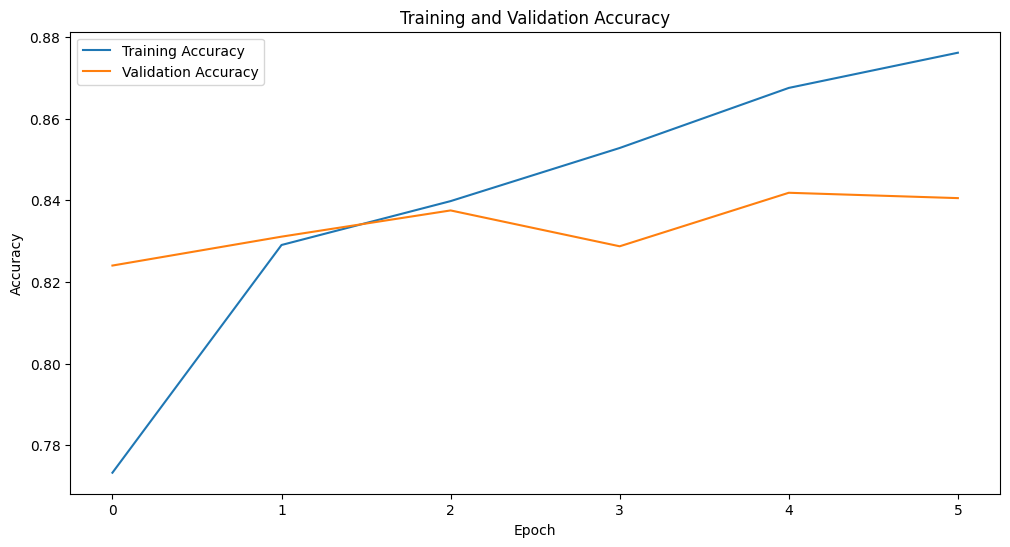

In [21]:
import json
from keras_tuner.engine.hyperparameters import HyperParameters
from keras_tuner import Hyperband
from keras.callbacks import EarlyStopping, ModelCheckpoint


# Khởi tạo tuner 
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=100,
    factor=3,
    directory='/kaggle/working/my_tuning',
    project_name='cnn_lstm_bert'
)

# Huấn luyện lại mô hình với các siêu tham số tốt nhất
model = tuner.hypermodel.build(best_hps)

# Thiết lập các callback (early stopping và checkpoint)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
checkpoint_filepath = '/kaggle/working/best1_weights.keras'
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Thực hiện huấn luyện với các siêu tham số tốt nhất
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,  # Lấy batch_size từ best_hps hoặc mặc định là 32
    callbacks=[early_stopping, checkpoint]
)

# Đánh giá mô hình trên tập kiểm tra
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Vẽ biểu đồ lịch sử huấn luyện
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


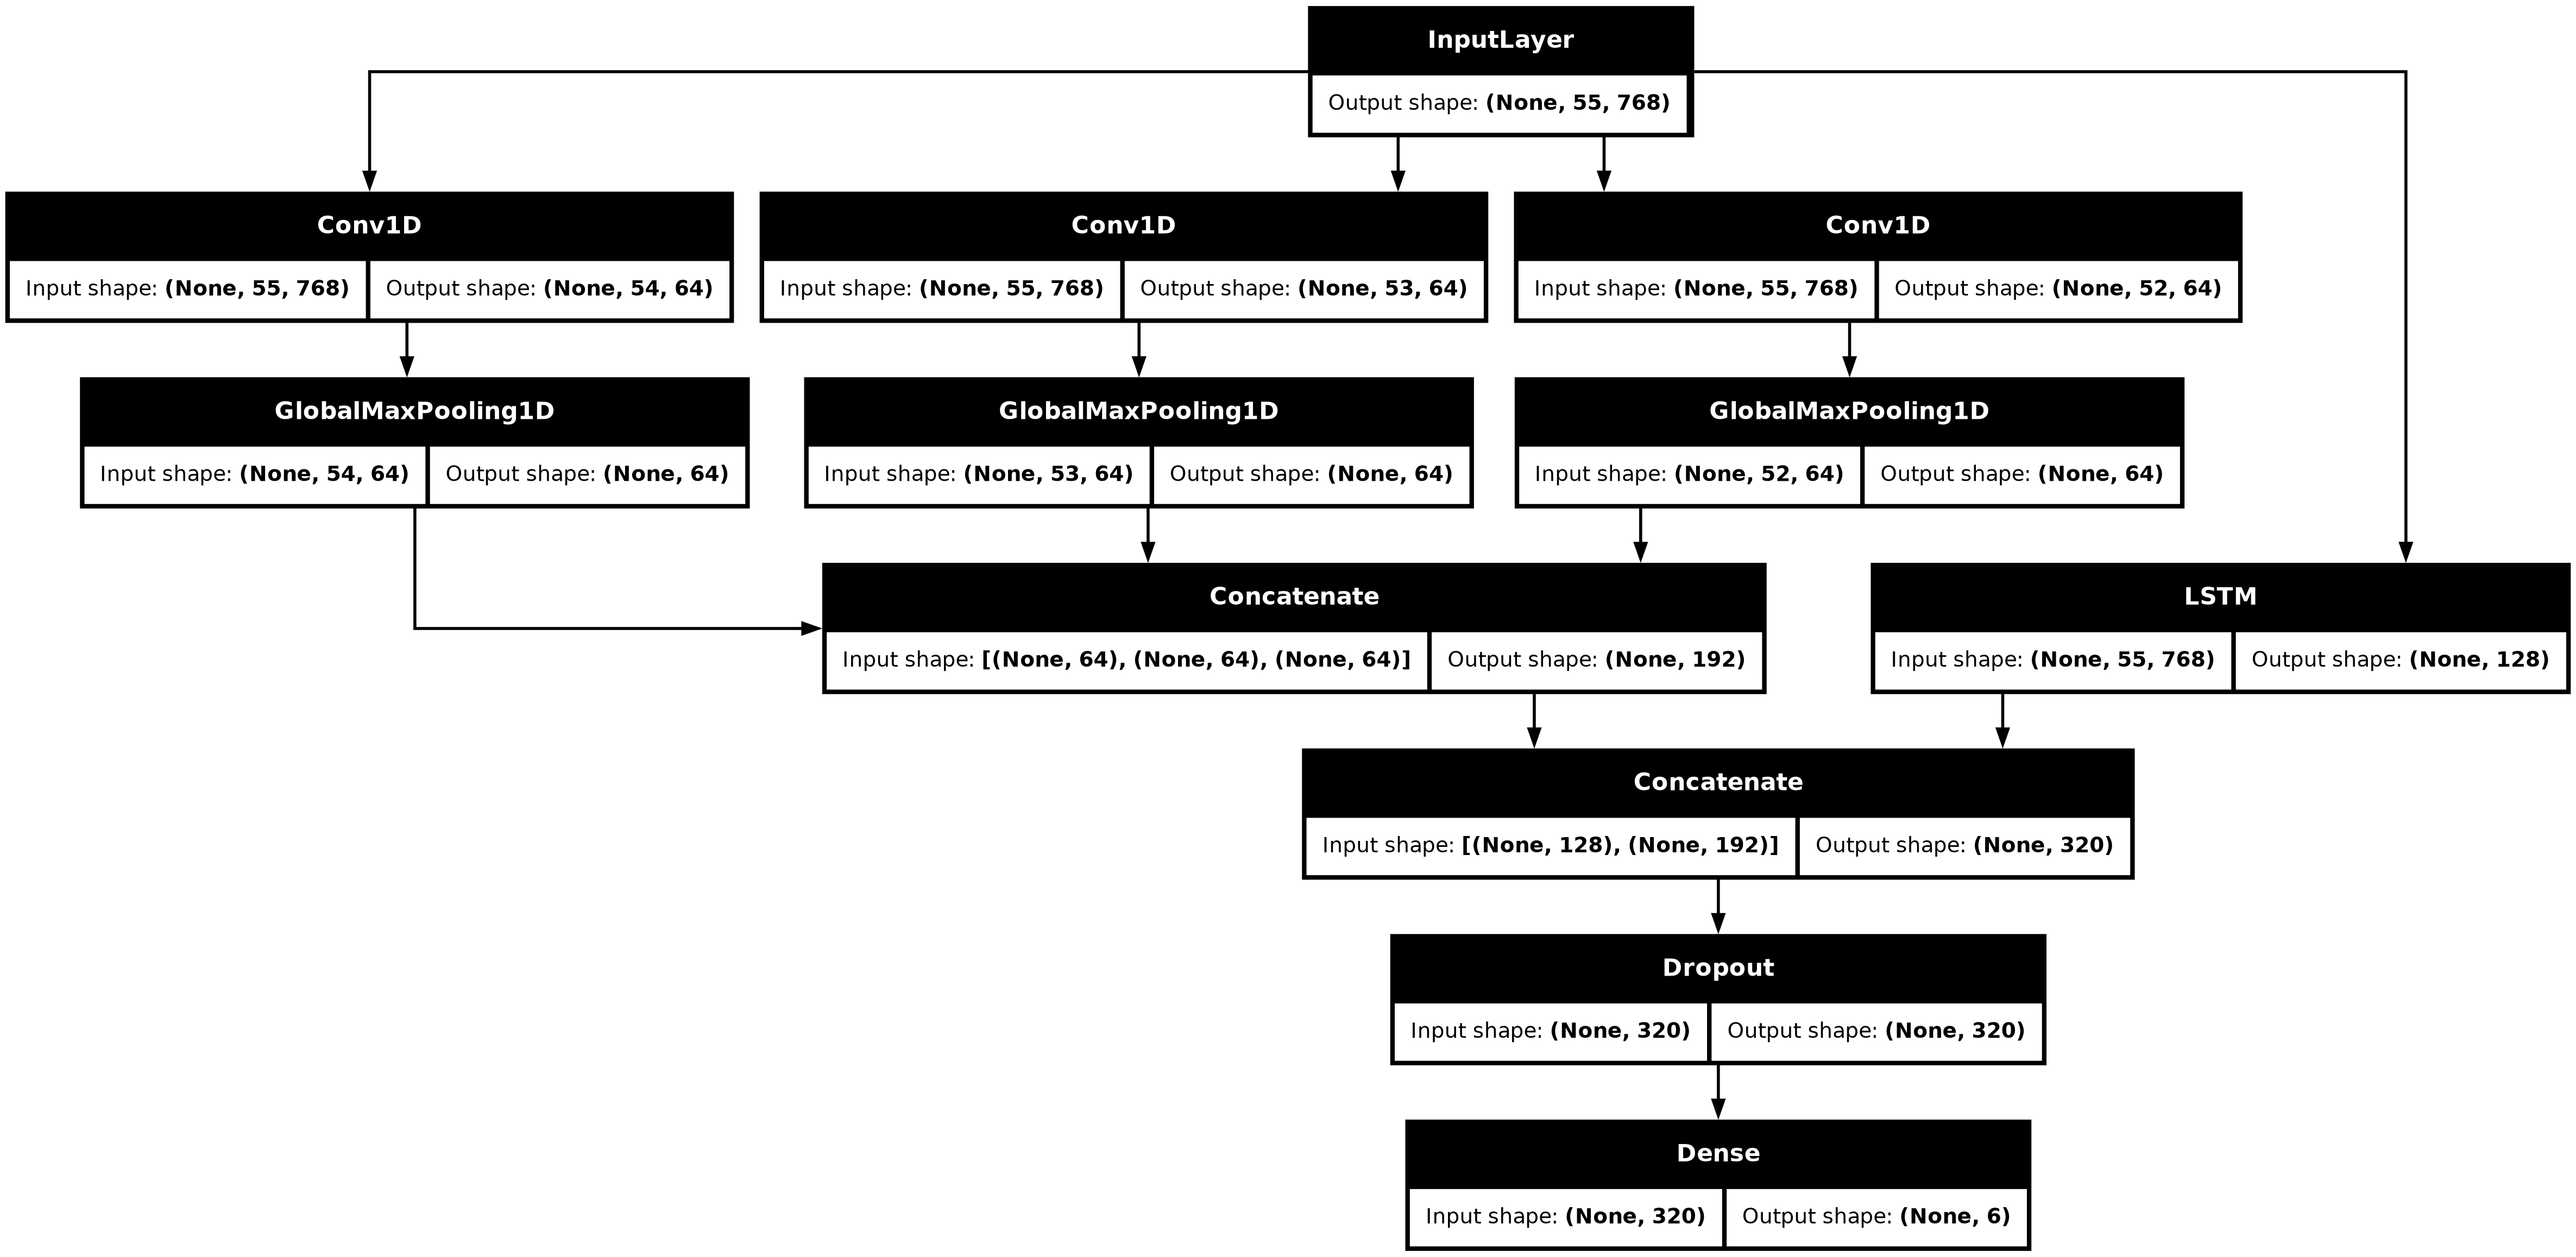

In [20]:
tf.keras.utils.plot_model(
    model,
    to_file='/kaggle/working/model.png',
    show_shapes=True,


)

#pre_dt

In [22]:
from keras.models import load_model

model.load_weights('/kaggle/working/best1_weights.keras')

In [25]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer

# Hợp nhất tất cả các nhãn
all_labels = np.concatenate([train_labels, test_labels])

# Khởi tạo LabelBinarizer và mã hóa tất cả các nhãn
label_binarizer = LabelBinarizer()
label_binarizer.fit(all_labels)

# In ra danh sách các nhãn
print("Danh sách các nhãn:")
print(label_binarizer.classes_)

# In ra nhãn mã hóa tương ứng
print("\nNhãn mã hóa tương ứng:")
for label in label_binarizer.classes_:
    print(f"Nhãn: {label} - Mã hóa: {label_binarizer.transform([label])[0]}")


Danh sách các nhãn:
['age' 'ethnicity' 'gender' 'not_cyberbullying' 'other_cyberbullying'
 'religion']

Nhãn mã hóa tương ứng:
Nhãn: age - Mã hóa: [1 0 0 0 0 0]
Nhãn: ethnicity - Mã hóa: [0 1 0 0 0 0]
Nhãn: gender - Mã hóa: [0 0 1 0 0 0]
Nhãn: not_cyberbullying - Mã hóa: [0 0 0 1 0 0]
Nhãn: other_cyberbullying - Mã hóa: [0 0 0 0 1 0]
Nhãn: religion - Mã hóa: [0 0 0 0 0 1]


299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report:
                     precision    recall  f1-score   support

                age       0.98      0.97      0.98      1598
          ethnicity       0.97      0.96      0.96      1592
             gender       0.94      0.79      0.86      1595
  not_cyberbullying       0.69      0.49      0.58      1589
other_cyberbullying       0.59      0.87      0.70      1565
           religion       0.94      0.95      0.95      1600

           accuracy                           0.84      9539
          macro avg       0.85      0.84      0.84      9539
       weighted avg       0.85      0.84      0.84      9539



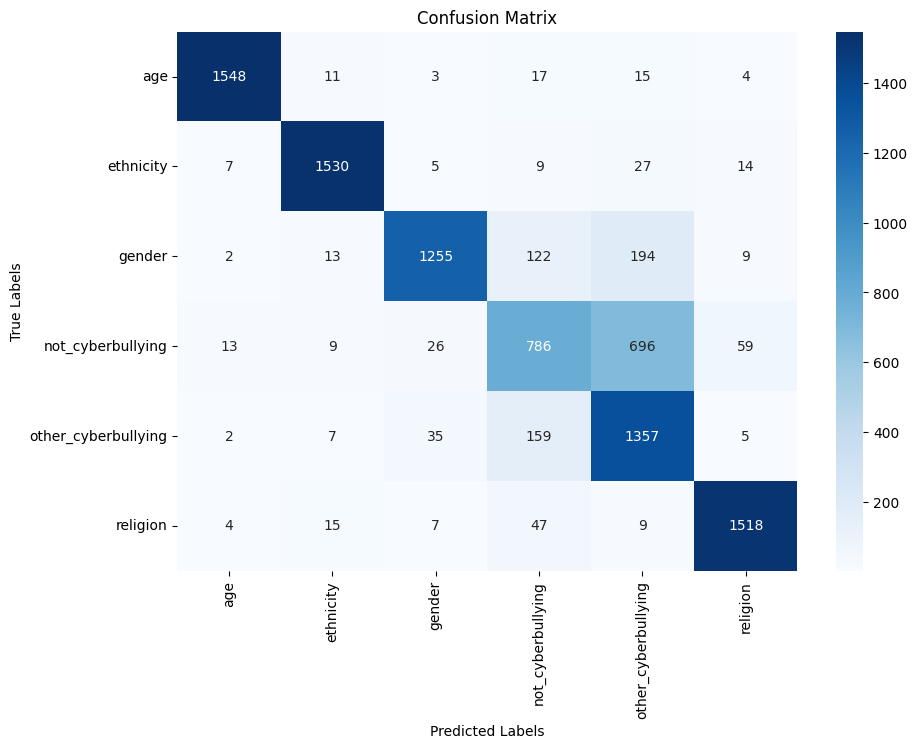

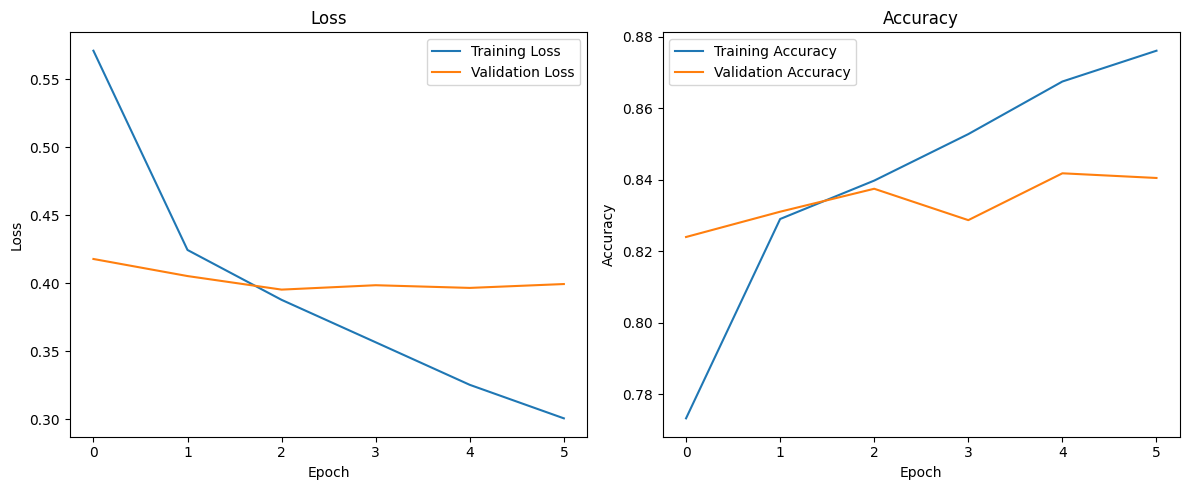

In [24]:
    from sklearn.metrics import classification_report, confusion_matrix
    import seaborn as sns
    # Dự đoán nhãn cho tập dữ liệu kiểm tra
    predictions = model.predict(X_test)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(y_test, axis=1)
    
    # Tạo báo cáo phân loại
    class_names = label_binarizer.classes_
    print("Classification Report:")
    print(classification_report(true_labels, predicted_labels, target_names=class_names))
    
    # Vẽ confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Vẽ biểu đồ loss và accuracy
    plt.figure(figsize=(12, 5))
    
    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [30]:
import joblib
import tensorflow as tf
import torch
from keras.models import load_model
import numpy as np
from sklearn.preprocessing import LabelBinarizer

# Giả sử bạn đã có hàm load_bert(), điều này tùy thuộc vào cách bạn định nghĩa
bert, tokenizer = load_bert()

# Hợp nhất tất cả các nhãn
all_labels = np.concatenate([train_labels, test_labels])

# Khởi tạo LabelBinarizer và mã hóa tất cả các nhãn
label_binarizer = LabelBinarizer()
label_binarizer.fit(all_labels)

def pad(texts, maxlen):
    # Chèn số 1 vào cuối câu nếu độ dài câu không đủ `maxlen`
    padded_texts = [tokens + [1] * (maxlen - len(tokens)) if len(tokens) < maxlen else tokens[:maxlen] for tokens in texts]
    # Chuyển các câu thành tensor
    padded_texts = torch.tensor(padded_texts)
    return padded_texts

def get_bert_features(model, input_ids):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    attention_mask = torch.where(input_ids != 1, torch.tensor(1), torch.tensor(0))

    # Chuyển đổi model và input sang device tương ứng (GPU hoặc CPU)
    model.to(device)
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

    return outputs.last_hidden_state  # Lấy đặc trưng từ lớp cuối cùng

def preprocess_raw_input(raw_input, maxlen):
    
    raw_input = PreDT(raw_input)
    a = []
    a.append(raw_input)
    i = pad(a, maxlen)
    input_dt = get_bert_features(bert, i)
    return input_dt

def inference_model(input_feature, model):
    input_feature = input_feature.cpu()

    # Chuyển tensor thành numpy array
    input_feature = input_feature.numpy()
    
    # Thực hiện suy luận với một đầu vào
    output = model.predict(input_feature)[0]  # Sử dụng numpy array input_feature trực tiếp
    print(output)

    # Chuyển đổi output thành nhãn gốc
    output = np.array(output).reshape(1, -1)  # Đảm bảo output có dạng 2D
    result = label_binarizer.inverse_transform(output)[0]
    
    # Lấy độ tự tin của dự đoán
    conf = float(output.max())
    
    return result, conf

# Định nghĩa hàm prediction
def prediction(raw_input, model, maxlen=55):
    input_model = preprocess_raw_input(raw_input, maxlen)
    result, conf = inference_model(input_model, model)
    return result, conf

# Tải mô hình, lấy trọng số của fold có acc lớn nhất
my_model = load_model('/kaggle/working/best1_weights.keras')

# Chạy vòng lặp dự đoán
while True:
    text = input("Nhập văn bản (hoặc để trống để dừng): ")
    if text == '':
        break
    else:
        print(prediction(text, my_model))


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

Nhập văn bản (hoặc để trống để dừng):  how are you


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
[2.5442094e-04 9.4155723e-05 1.2108984e-03 7.0860511e-01 2.8969321e-01
 1.4218189e-04]
('not_cyberbullying', 0.7086051106452942)


Nhập văn bản (hoặc để trống để dừng):  how old are you?


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[3.0377945e-03 2.9091677e-04 4.8435599e-02 2.8458944e-01 6.6306818e-01
 5.7804439e-04]
('other_cyberbullying', 0.6630681753158569)


Nhập văn bản (hoặc để trống để dừng):  2014:Bombay High Court Ordered to Remove Illegal Loudspeaker from MosquÃ¨s 2016:Mumbai Police to RTI Says "As it can Create a Law &amp; Order, No action has been Taken" 2020:Hindu Girl Karishma &amp; Police Bullied for Requesting to Lower the Volume &amp; MLA Told Her to Vacate Her House!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[6.2864375e-01 1.5647043e-03 1.1653334e-03 7.8256493e-03 4.2830643e-04
 3.6037230e-01]
('age', 0.6286437511444092)


Nhập văn bản (hoặc để trống để dừng):  
